<a href="https://hubconexa.com/">
    <img alt="Conexa labs logo" src="./img/conexa-logo.svg" style="height:70px; align:left">
</a>

<h1 align=center><font size=5>Desafio Data Analyst</font></h1>

<h1>Relatório</h1>

<h3>Contexto</h3>

Este relatório foi elaborado como pré-requisito para prosseguimento no processo seletivo para a vaga de analista de dados na companhia Conexa - Hub de Inovação Siagri.

<h2>Sumário</h2>

<div class="alert alert-block alert-light" style="margin-top: 20px">
<ul>
    <li><a href="#intro">Introdução</a></li>
        <ul>
            <li><a href="#dataset_selection">Escolha do dataset</a></li>
            <li><a href="#dataset_catalog">Catálogo de dados</a></li>
            <li><a href="#dataset_questions">Perguntas</a></li>
        </ul>
    <li><a href="#identify_handle_missing_values">Tratamento de dados</a>
        <ul>
            <li><a href="#missing_identify">Identificação de dados ausentes</a></li>
            <li><a href="#missing_handle">Tratamento de dados ausentes</a></li>
            <li><a href="#data_format">Formato de dados</a></li>            
        </ul>
    </li>
</ul>
</div>

<hr>

<h2 id="intro">Introdução:</h2>

<h3 id="dataset_selection">Escolha do dataset</h3>

<div style="text-align: justify">
Foram disponibilizados dois datasets, sendo necessária a escolha de um deles. O primeiro conjunto de dados é referente à venda de jogos digitais, enquanto que o segundo traz informações sobre os passageiros do navio titanic. O mercado de jogos digitais movimenta <a href="https://www.statista.com/topics/868/video-games/#:~:text=Video%20games%20are%20a%20billion,over%2077%20billion%20U.S.%20dollars.">bilhões de dólares</a> todos os anos. O Brasil é, atualmente, o <a href="https://valorinveste.globo.com/objetivo/empreenda-se/noticia/2019/07/30/brasil-e-o-13o-maior-mercado-de-games-do-mundo-e-o-maior-da-america-latina.ghtml">13º maior mercado de jogos no mundo<a>. Há fortes indícios de que o <a href="https://revistapegn.globo.com/Tecnologia/noticia/2020/08/mercado-de-games-escapa-da-crise-e-cresce-com-isolamento-social.html">desenvolvimento de jogos nacional ainda deve crescer bastante</a>. Desse modo, optou-se pela análise do dataset referente à venda de jogos digitais. Com isso, espera-se gerar insights que permitam aos desenvolvedores de jogos nacionais visualizarem formas de otimizar a rentabilidade desse mercado.
</div>

<h3 id="dataset_catalog">Dicionário de dados</h3>

A tabela abaixo indica a estrutura do conjunto de dados escolhido.

Campo | Descrição
----- | ---------
Name | Nome do jogo
Platform | Plataforma de lançamento dos jogos (PC, PS4, etc.)
Year | Ano de lançamento do jogo
Genre | Gênero do jogo
Publisher | Editora do jogo
NA_Sales | Vendas na América do Norte (em milhões)
EU_Sales | Vendas na Europa (em milhões)
JP_Sales | Vendas no Japão (em milhões)
Other_Sales | Vendas no resto do mundo (em milhões)
Global_Sales | Total de vendas mundiais.

<h3>Importação de dados</h3>

<p>
O dataset pode ser encontrado no link: <a href="https://github.com/conexalabs/desafio-data-analyst/blob/main/data/selling_games.parquet">https://github.com/conexalabs/desafio-data-analyst/blob/main/data/selling_games.parquet</a>. 
</p>

In [52]:
!pip install pyarrow

import pandas as pd
import numpy as np

<h3>Leitura dos dados a partir do arquivo</h3>

Após a importação dos dados

In [138]:
filename = "./data/selling_games.parquet"
df = pd.read_parquet(filename, engine='pyarrow')
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<h3>Perguntas</h3>

<ol>
    <li>Os dados estão limpos e bem estruturados?</li>
    <li>Quais variáveis apresentam maior correlação com o total de vendas em cada mercado?</li>
    <li>Quais plataformas, gêneros e editoras tiveram o maior total de vendas mundiais nos últimos 5 anos?</li>
    <li>Quais foram os 10 jogos mais vendidos em cada mercado nos últimos 10 anos</li>
</ol>

<h2 id="intro">Identificação e Tratamento de dados:</h2>

<h3 id="missing_identify">Identificação de dados ausentes</h3>

Para identificação dos dados ausentes, é importante determinar a dimensão do conjunto de dados.

In [133]:
df.shape

(16291, 10)

Pode-se afirmar que existem 16.598 linhas e 10 colunas no dataset analisado.

In [146]:
missing_data = df.isnull().sum()
missing_data

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Baseado nos dados acima, é possível notar que das 16.598 linhas, apenas duas colunas apresentaram dados ausentes: "Year" e "Publisher". O gráfico abaixo apresenta a distribuição dos dados ausentes.

In [149]:
!pip install matplotlib-venn

import matplotlib.pyplot as plt
from matplotlib_venn import venn2

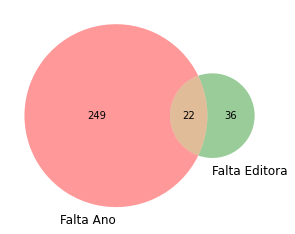

In [154]:
missing_total = df.isnull().any(axis=1).sum()
missing_publisher = missing_total - 271
missing_year = missing_total - 58
missing_both = missing_total - missing_year - missing_publisher

venn2(subsets = (missing_year, missing_publisher, missing_both), set_labels = ('Falta Ano', 'Falta Editora'))
plt.show()

<strong>Total:</strong> 307

<h3 id="missing_handle">Tratamento de dados ausentes</h3>

Optou-se pela eliminação das linhas nas quais o ano ou editora não estivesse presente.

In [156]:
df.dropna(subset=["Year", "Publisher"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(16291, 10)

Após a modificação, o número de registros foi reduzido de 16.598 para 16.291. A redução de 307 linhas é equivalente ao total de linhas com dados ausentes indicado na seção interior.

<h3 id="missing_handle">Formato de dados</h3>

Os tipos de dados de cada coluna são indicados abaixo.

In [64]:
df.dtypes

Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

Dados númericos devem ser apresentados nos formatos 'float' ou 'int'. Dados categóricos, por outro lado, devem ser apresentados no formato 'object'. Os dados referentes ao ano poderiam ser convertidos para 'datetime'. No entanto, tendo em vista que, nesse caso, apenas o ano nos interessa, não vemos necessidade de efetuar essa conversão.